In [4]:
import warnings
warnings.filterwarnings('ignore')

Connecting to the Crypto API with the key


In [5]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = { 
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'c3749cb8-8b4f-4f9a-869f-e06b3ada96ea',
}
session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-01-09T23:12:42.780Z', 'error_code': 0, 'error_message': None, 'elapsed': 15, 'credit_count': 1, 'notice': None, 'total_count': 8853}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9923, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

In [6]:
type(data)

dict

In [7]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.options.display.max_columns = None

##Making the above output in a readable format

In [8]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now') #To understand when the data is stored 
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9923,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.925735e+07,1.925735e+07,NaN,1,NaN,NaN,None,2023-01-09T23:10:00.000Z,17183.109296,1.900819e+10,111.4346,-0.035268,0.910216,2.747635,0.193356,-3.650944,-9.809077,3.309011e+11,39.0412,3.608453e+11,None,2023-01-09T23:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-09 23:12:43.254310
1,1027,Ethereum,ETH,ethereum,6341,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,None,2023-01-09T23:10:00.000Z,1318.290470,8.263482e+09,173.9137,-0.095563,3.131089,8.362863,3.771726,-0.435645,2.866359,1.613243e+11,19.0160,1.613243e+11,None,2023-01-09T23:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-09 23:12:43.254310
2,825,Tether,USDT,tether,45928,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.627249e+10,7.314177e+10,NaN,3,NaN,NaN,None,2023-01-09T23:10:00.000Z,0.999993,3.187974e+10,130.9567,0.004774,0.004036,0.021741,-0.007047,0.215541,0.004881,6.627201e+10,7.8115,7.314123e+10,None,2023-01-09T23:10:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-01-09 23:12:43.254310
3,3408,USD Coin,USDC,usd-coin,9453,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.358137e+10,4.358137e+10,NaN,4,NaN,NaN,None,2023-01-09T23:10:00.000Z,0.999905,3.768546e+09,127.7797,-0.004331,-0.045072,-0.013147,-0.014224,-0.090458,-0.017997,4.357724e+10,5.1365,4.357724e+10,None,2023-01-09T23:10:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-01-09 23:12:43.254310
4,1839,BNB,BNB,bnb,1165,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.599631e+08,1.599800e+08,NaN,5,NaN,NaN,None,2023-01-09T23:10:00.000Z,272.329022,8.040182e+08,74.7482,0.127334,-0.657630,10.492353,-5.494031,-11.101842,0.421117,4.356260e+10,5.1347,5.446580e+10,None,2023-01-09T23:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-09 23:12:43.254310
5,52,XRP,XRP,xrp,873,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.062329e+10,9.998916e+10,NaN,6,NaN,NaN,None,2023-01-09T23:10:00.000Z,0.348415,1.433421e+09,201.0675,-0.083402,1.274125,-0.353726,-9.920856,-12.432147,-28.975061,1.763790e+10,2.0790,3.484148e+10,None,2023-01-09T23:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-09 23:12:43.254310
6,4687,Binance USD,BUSD,binance-usd,5974,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.630340e+10,1.630340e+10,NaN,7,NaN,NaN,None,2023-01-09T23:10:00.000Z,1.000090,7.587511e+09,165.1682,-0.025569,0.001561,0.020890,0.015999,-0.151294,0.035625,1.630487e+10,1.9219,1.630487e+10,None,2023-01-09T23:10:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2023-01-09 23:12:43.254310
7,2010,Cardano,ADA,cardano,632,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.452200e+10,3.528563e+10,NaN,8,NaN,NaN,None,2023-01-09T23:10:00.000Z,0.315505,9.592712e+08,157.5291,0.006586,7.204272,24.025798,0.908389,-15.269937,-19.788530,1.089186e+10,1.2838,1.419772e+10,None,2023-01-09T23:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-09 23:12:43.254310
8,74,Dogecoin,DOGE,dogecoin,631,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.326708e+11,1.326708e+11,NaN,9,NaN,Na

####Automating appending of more data 


In [9]:
def api_runner():
    global df
    from requests import Request, Session
    from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
    import json

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = { 
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'c3749cb8-8b4f-4f9a-869f-e06b3ada96ea',
    }
    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df
    
    if not os.path.isfile(r'/Users/saaaii/Desktop/PortfolioProjects/API.csv'):
        df.to_csv(r'/Users/saaaii/Desktop/PortfolioProjects/API.csv', header= 'column_names')
    else:
        df.to_csv(r'/Users/saaaii/Desktop/PortfolioProjects/API.csv', mode = 'a', header= False)

In [10]:
import os 
from time import time
from time import sleep

for i in range(333): #api only supports 333 times a day to pull data
    api_runner()
    print('API runner completed successfully')
    sleep(60)#Sleep for one minute
    
exit()

API runner completed successfully
API runner completed successfully


KeyboardInterrupt: 

In [11]:
df32 = pd.read_csv(r'/Users/saaaii/Desktop/PortfolioProjects/API.csv', index_col=0)
df32

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9922,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.925532e+07,1.925532e+07,NaN,1,NaN,NaN,NaN,2023-01-07T19:40:00.000Z,16946.454969,9.520765e+09,-27.1734,0.038452,0.385072,2.139174,-1.670879,-6.861990,-12.919102,3.263094e+11,39.5781,3.558756e+11,NaN,2023-01-07T19:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-07 19:42:03.825472
1,1027,Ethereum,ETH,ethereum,6333,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,NaN,2023-01-07T19:40:00.000Z,1265.128895,2.837909e+09,-39.3434,0.126781,-0.383192,5.280855,-1.332880,-3.216274,-4.094622,1.548187e+11,18.7806,1.548187e+11,NaN,2023-01-07T19:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-07 19:42:03.825472
2,825,Tether,USDT,tether,45859,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,6.627249e+10,7.314177e+10,NaN,3,NaN,NaN,NaN,2023-01-07T19:40:00.000Z,0.999867,1.385534e+10,-27.2939,0.005098,0.011931,0.014905,-0.021567,-0.064768,-0.025997,6.626365e+10,8.0383,7.313201e+10,NaN,2023-01-07T19:40:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-01-07 19:42:03.825472
3,3408,USD Coin,USDC,usd-coin,9433,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,4.377631e+10,4.377631e+10,NaN,4,NaN,NaN,NaN,2023-01-07T19:40:00.000Z,1.000036,1.820911e+09,-18.5021,0.001331,-0.006825,-0.000610,-0.007067,0.013824,0.013419,4.377788e+10,5.3106,4.377788e+10,NaN,2023-01-07T19:40:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-01-07 19:42:03.825472
4,1839,BNB,BNB,bnb,1165,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",2.000000e+08,1.599635e+08,1.599800e+08,NaN,5,NaN,NaN,NaN,2023-01-07T19:40:00.000Z,261.534832,3.421283e+08,-15.9393,0.019950,0.853168,5.933383,-9.831801,-17.362087,-5.984221,4.183603e+10,5.0750,5.230697e+10,NaN,2023-01-07T19:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-07 19:42:03.825472
5,52,XRP,XRP,xrp,872,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.056377e+10,9.998917e+10,NaN,6,NaN,NaN,NaN,2023-01-07T19:40:00.000Z,0.345055,4.015883e+08,-44.8551,0.006930,1.169252,0.623800,-12.033121,-7.381792,-36.143407,1.744730e+10,2.1165,3.450554e+10,NaN,2023-01-07T19:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-07 19:42:03.825472
6,4687,Binance USD,BUSD,binance-usd,5959,2019-09-20T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'bin...",NaN,1.642497e+10,1.642497e+10,NaN,7,NaN,NaN,NaN,2023-01-07T19:40:00.000Z,1.000277,3.034347e+09,-38.5615,-0.007678,0.015314,0.004108,0.028772,-0.036253,-0.016274,1.642952e+10,1.9930,1.642952e+10,NaN,2023-01-07T19:40:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2023-01-07 19:42:03.825472
7,74,Dogecoin,DOGE,dogecoin,629,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.326708e+11,1.326708e+11,NaN,8,NaN,NaN,NaN,2023-01-07T19:40:00.000Z,0.072188,1.956499e+08,-37.3176,0.119683,0.448406,2.406043,-26.545089,-16.252042,16.318564,9.577262e+09,1.1618,9.577262e+09,NaN,2023-01-07T19:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-07 19:42:03.825472
8,2010,Cardano,ADA,cardano,627,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.451864e+10,3.530394e+10,NaN,9,NaN,NaN,NaN,2023-01-0

#Removing scientic Notation from max_supply column to make it more readable

In [12]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df32

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9922,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19255318.00000,19255318.00000,NaN,1,NaN,NaN,NaN,2023-01-07T19:40:00.000Z,16946.45497,9520765254.68136,-27.17340,0.03845,0.38507,2.13917,-1.67088,-6.86199,-12.91910,326309379409.98151,39.57810,355875554359.03998,NaN,2023-01-07T19:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-07 19:42:03.825472
1,1027,Ethereum,ETH,ethereum,6333,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,NaN,2023-01-07T19:40:00.000Z,1265.12889,2837908938.21431,-39.34340,0.12678,-0.38319,5.28086,-1.33288,-3.21627,-4.09462,154818714085.99271,18.78060,154818714085.98999,NaN,2023-01-07T19:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-07 19:42:03.825472
2,825,Tether,USDT,tether,45859,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,66272490385.29659,73141766321.23428,NaN,3,NaN,NaN,NaN,2023-01-07T19:40:00.000Z,0.99987,13855336948.64403,-27.29390,0.00510,0.01193,0.01491,-0.02157,-0.06477,-0.02600,66263646994.12544,8.03830,73132006294.91000,NaN,2023-01-07T19:40:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-01-07 19:42:03.825472
3,3408,USD Coin,USDC,usd-coin,9433,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,43776307316.92825,43776307316.92825,NaN,4,NaN,NaN,NaN,2023-01-07T19:40:00.000Z,1.00004,1820911312.69160,-18.50210,0.00133,-0.00683,-0.00061,-0.00707,0.01382,0.01342,43777878357.82043,5.31060,43777878357.82000,NaN,2023-01-07T19:40:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-01-07 19:42:03.825472
4,1839,BNB,BNB,bnb,1165,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",200000000.00000,159963524.47069,159979963.59043,NaN,5,NaN,NaN,NaN,2023-01-07T19:40:00.000Z,261.53483,342128274.71473,-15.93930,0.01995,0.85317,5.93338,-9.83180,-17.36209,-5.98422,41836033548.20573,5.07500,52306966462.06000,NaN,2023-01-07T19:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-07 19:42:03.825472
5,52,XRP,XRP,xrp,872,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,50563767827.00000,99989171756.00000,NaN,6,NaN,NaN,NaN,2023-01-07T19:40:00.000Z,0.34506,401588333.89053,-44.85510,0.00693,1.16925,0.62380,-12.03312,-7.38179,-36.14341,17447301476.83103,2.11650,34505540679.89000,NaN,2023-01-07T19:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-07 19:42:03.825472
6,4687,Binance USD,BUSD,binance-usd,5959,2019-09-20T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'bin...",NaN,16424967225.66406,16424967225.66406,NaN,7,NaN,NaN,NaN,2023-01-07T19:40:00.000Z,1.00028,3034346680.82886,-38.56150,-0.00768,0.01531,0.00411,0.02877,-0.03625,-0.01627,16429515591.20524,1.99300,16429515591.21000,NaN,2023-01-07T19:40:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2023-01-07 19:42:03.825472
7,74,Dogecoin,DOGE,dogecoin,629,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,132670764299.89407,132670764299.89407,NaN,8,NaN,NaN,NaN,2023-01-07T19:40:00.000Z,0.07219,195649856.23954,-37.31760,0.11968,0.44841,2.40604,-26.54509,-16.25204,16.31856,9577262338.95456,1.16180,9577262338.95000,NaN,2023-01-07T19:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-07 19:42:03.825472
8,2010,Card

In [13]:
df32.columns

Index(['id', 'name', 'symbol', 'slug', 'num_market_pairs', 'date_added',
       'tags', 'max_supply', 'circulating_supply', 'total_supply', 'platform',
       'cmc_rank', 'self_reported_circulating_supply',
       'self_reported_market_cap', 'tvl_ratio', 'last_updated',
       'quote.USD.price', 'quote.USD.volume_24h',
       'quote.USD.volume_change_24h', 'quote.USD.percent_change_1h',
       'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
       'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d', 'quote.USD.market_cap',
       'quote.USD.market_cap_dominance', 'quote.USD.fully_diluted_market_cap',
       'quote.USD.tvl', 'quote.USD.last_updated', 'platform.id',
       'platform.name', 'platform.symbol', 'platform.slug',
       'platform.token_address', 'timestamp'],
      dtype='object')

In [14]:
df3 = df32.groupby ('name', sort = False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_90d
name,,,,,
Bitcoin,0.01388,0.56012,2.34199,-1.04947,-11.88243
Ethereum,0.05267,0.78824,6.30819,0.36866,-1.77430
Tether,0.00499,0.00930,0.01718,-0.01673,-0.01570
USD Coin,-0.00056,-0.01957,-0.00479,-0.00945,0.00295
BNB,0.05574,0.34957,7.45304,-8.38588,-3.84911
XRP,-0.02318,1.20421,0.29796,-11.32903,-33.75396
Binance USD,-0.01364,0.01073,0.00970,0.02451,0.00103
Dogecoin,0.11237,1.23795,3.35781,-24.96239,19.42814
Cardano,0.30764,2.97376,15.78959,-7.73252,-29.55161


In [15]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.01388
             quote.USD.percent_change_24h     0.56012
             quote.USD.percent_change_7d      2.34199
             quote.USD.percent_change_30d    -1.04947
             quote.USD.percent_change_90d   -11.88243
Ethereum     quote.USD.percent_change_1h      0.05267
             quote.USD.percent_change_24h     0.78824
             quote.USD.percent_change_7d      6.30819
             quote.USD.percent_change_30d     0.36866
             quote.USD.percent_change_90d    -1.77430
Tether       quote.USD.percent_change_1h      0.00499
             quote.USD.percent_change_24h     0.00930
             quote.USD.percent_change_7d      0.01718
             quote.USD.percent_change_30d    -0.01673
             quote.USD.percent_change_90d    -0.01570
USD Coin     quote.USD.percent_change_1h     -0.00056
             quote.USD.percent_change_24h    -0.01957
             quote.USD.percent_change_7d

In [16]:
type(df4)

pandas.core.series.Series

In [17]:
df5 = df4.to_frame(name = 'values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.01388
            quote.USD.percent_change_24h   0.56012
            quote.USD.percent_change_7d    2.34199
            quote.USD.percent_change_30d  -1.04947
            quote.USD.percent_change_90d -11.88243
Ethereum    quote.USD.percent_change_1h    0.05267
            quote.USD.percent_change_24h   0.78824
            quote.USD.percent_change_7d    6.30819
            quote.USD.percent_change_30d   0.36866
            quote.USD.percent_change_90d  -1.77430
Tether      quote.USD.percent_change_1h    0.00499
            quote.USD.percent_change_24h   0.00930
            quote.USD.percent_change_7d    0.01718
            quote.USD.percent_change_30d  -0.01673
            quote.USD.percent_change_90d  -0.01570
USD Coin    quote.USD.percent_change_1h   -0.00056
            quote.USD.percent_change_24h  -0.01957
            quote.USD.percent_change_7d   -0.00479
            quote.USD.percent_change_30d  -0.00945
            quote.USD.percent_change_90d   0.00295
BNB         quote.USD.percent_change_1h    0.05574
            quote.USD.percent_change_24h   0.34957
            quote.USD.percent_change_7d    7.45304
            quote.USD.percent_change_30d  -8.38588
            quote.USD.percent_change_90d  -3.84911
XRP         quote.USD.percent_change_1h   -0.02318
            quote.USD.percent_change_24h   1.20421
            quote.USD.percent_change_7d    0.29796
            quote.USD.percent_change_30d -11.32903
            quote.USD.percent_change_90d -33.75396
Binance USD quote.USD.percent_change_1h   -0.01364
            quote.USD.percent_change_24h   0.01073
            quote.USD.percent_change_7d    0.00970
            quote.USD.percent_change_30d   0.02451
            quote.USD.percent_change_90d   0.00103
Dogecoin    quote.USD.percent_change_1h    0.11237
            quote.USD.percent_change_24h   1.23795
            quote.USD.percent_change_7d    3.35781
            quote.USD.percent_change_30d -24.96239
            quote.USD.percent_change_90d  19.42814
Cardano     quote.USD.percent_change_1h    0.30764
            quote.USD.percent_change_24h   2.97376
            quote.USD.percent_change_7d   15.78959
            quote.USD.percent_change_30d  -7.73252
            quote.USD.percent_change_90d -29.55161
Polygon     quote.USD.percent_change_1h    0.05236
            quote.USD.percent_change_24h   1.30458
            quote.USD.percent_change_7d    6.21198
            quote.USD.percent_change_30d -10.91591
            quote.USD.percent_change_90d   0.61481
Dai         quote.USD.percent_change_1h   -0.02941
            quote.USD.percent_change_24h  -0.05915
            quote.USD.percent_change_7d   -0.04036
            quote.USD.percent_change_30d  -0.02394
            quote.USD.percent_change_90d  -0.02667
Litecoin    quote.USD.percent_change_1h    0.31172
            quote.USD.percent_change_24h   2.63472
            quote.USD.percent_change_7d    8.87937
            quote.USD.percent_change_30d   1.77455
            quote.USD.percent_change_90d  47.42209
Polkadot    quote.USD.percent_change_1h    0.08631
            quote.USD.percent_change_24h   0.55355
            quote.USD.percent_change_7d    7.74310
            quote.USD.percent_change_30d -12.01292
            quote.USD.percent_change_90d -25.71338
Solana      quote.USD.percent_change_1h   -0.50366
            quote.USD.percent_change_24h   5.10674
            quote.USD.percent_change_7d   35.03241
            quote.USD.percent_change_30d   3.85933
            quote.USD.percent_change_90d -56.04241
TRON        quote.USD.percent_change_1h    0.10937
            quote.USD.percent_change_24h  -0.27505
            quote.USD.percent_change_7d   -3.85756
            quote.USD.percent_change_30d  -2.93578
            quote.USD.percent_change_90d -15.54901

In [18]:
df5.count()

values    75
dtype: int64

In [19]:
index = pd.Index(range(75))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.01388
1,Bitcoin,quote.USD.percent_change_24h,0.56012
2,Bitcoin,quote.USD.percent_change_7d,2.34199
3,Bitcoin,quote.USD.percent_change_30d,-1.04947
4,Bitcoin,quote.USD.percent_change_90d,-11.88243
5,Ethereum,quote.USD.percent_change_1h,0.05267
6,Ethereum,quote.USD.percent_change_24h,0.78824
7,Ethereum,quote.USD.percent_change_7d,6.30819
8,Ethereum,quote.USD.percent_change_30d,0.36866
9,Ethereum,quote.USD.percent_change_90d,-1.77430


In [20]:
df7 = df6.rename(columns = {'level_1': 'percentage_change'})
df7

,name,percentage_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.01388
1,Bitcoin,quote.USD.percent_change_24h,0.56012
2,Bitcoin,quote.USD.percent_change_7d,2.34199
3,Bitcoin,quote.USD.percent_change_30d,-1.04947
4,Bitcoin,quote.USD.percent_change_90d,-11.88243
5,Ethereum,quote.USD.percent_change_1h,0.05267
6,Ethereum,quote.USD.percent_change_24h,0.78824
7,Ethereum,quote.USD.percent_change_7d,6.30819
8,Ethereum,quote.USD.percent_change_30d,0.36866
9,Ethereum,quote.USD.percent_change_90d,-1.77430


In [21]:
df7['percentage_change'] =  df7['percentage_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'], ['1h', '24h', '7d', '30d', '60d', '90d'])

In [22]:
df7

,name,percentage_change,values
0,Bitcoin,1h,0.01388
1,Bitcoin,24h,0.56012
2,Bitcoin,7d,2.34199
3,Bitcoin,30d,-1.04947
4,Bitcoin,90d,-11.88243
5,Ethereum,1h,0.05267
6,Ethereum,24h,0.78824
7,Ethereum,7d,6.30819
8,Ethereum,30d,0.36866
9,Ethereum,90d,-1.77430


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt 

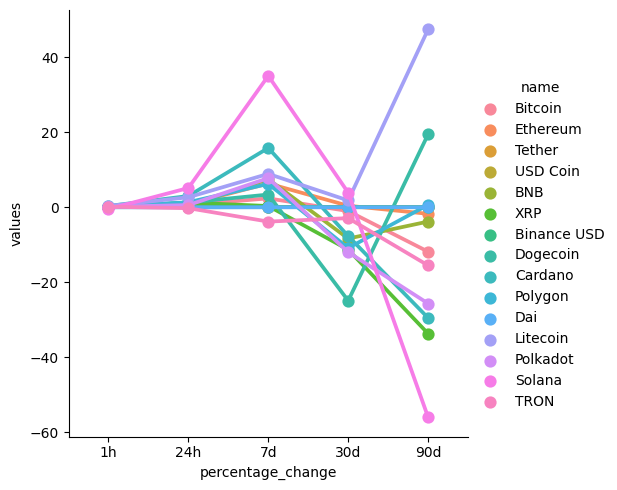

In [24]:
sns.catplot(x = 'percentage_change', y = 'values', data = df7, kind = 'point', hue= 'name')

In [25]:
df10 = df32[['name', 'quote.USD.price', 'timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,16946.45497,2023-01-07 19:42:03.825472
0,Bitcoin,16946.45497,2023-01-07 19:42:03.825472
0,Bitcoin,16946.45497,2023-01-07 19:42:03.825472
0,Bitcoin,16946.45497,2023-01-07 19:42:03.825472
0,Bitcoin,17183.10930,2023-01-09 23:12:43.254310
0,Bitcoin,17183.10930,2023-01-09 23:12:43.254310


<AxesSubplot: xlabel='timestamp', ylabel='quote.USD.price'>

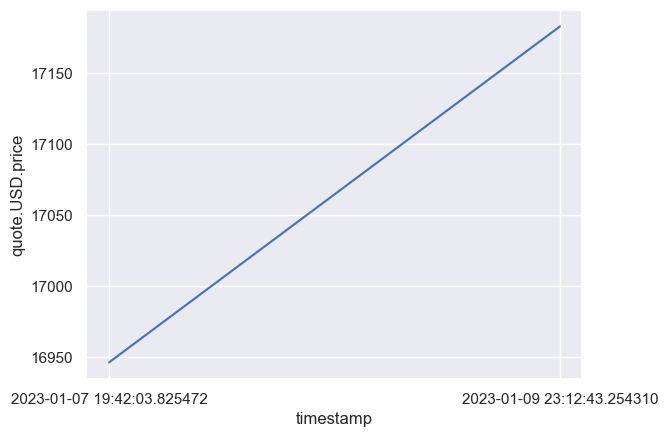

In [26]:
sns.set_theme(style = "darkgrid")
sns.lineplot(x = "timestamp", y = "quote.USD.price", data=df10)